In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('sample_submission.csv')

In [ ]:
data

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245126,245126,23,female,bba,6.70,83.5,yes,9.4,good,coaching,high,hard,98.6
245127,245127,19,other,bba,7.32,88.2,yes,6.4,poor,coaching,low,moderate,74.3
245128,245128,20,male,diploma,2.36,57.4,yes,7.3,average,mixed,low,moderate,43.3
245129,245129,19,female,b.sc,6.38,89.8,yes,4.8,good,mixed,low,moderate,78.7


In [ ]:
target = 'exam_score'

In [ ]:
X = data.drop(target, axis=1)
y = data[target]

In [ ]:
X_test = test_data

In [ ]:
for column in X.select_dtypes(include='object').columns:
    print(f"Unique values for '{column}':")
    print(X[column].unique())
    print("-" * 30)

Unique values for 'gender':
['female' 'other' 'male']
------------------------------
Unique values for 'course':
['b.sc' 'diploma' 'bca' 'b.com' 'ba' 'bba' 'b.tech']
------------------------------
Unique values for 'internet_access':
['no' 'yes']
------------------------------
Unique values for 'sleep_quality':
['average' 'poor' 'good' nan]
------------------------------
Unique values for 'study_method':
['online videos' 'self-study' 'coaching' 'group study' 'mixed' nan]
------------------------------
Unique values for 'facility_rating':
['low' 'medium' 'high' nan]
------------------------------
Unique values for 'exam_difficulty':
['easy' 'moderate' 'hard' nan]
------------------------------


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.isnull().sum()

,0
id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,1
study_method,1


In [ ]:
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

In [ ]:
if 'id' in numerical_features:
    numerical_features.remove('id')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
Encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

In [ ]:
X_train_categorical = X_train[categorical_features]
X_train_numerical = X_train[numerical_features]

In [ ]:
X_train_encoded_sparse = Encoder.fit_transform(X_train_categorical)
feature_names_encoded = Encoder.get_feature_names_out(categorical_features)

In [ ]:
X_train_encoded_df = pd.DataFrame(X_train_encoded_sparse.toarray(), columns=feature_names_encoded, index=X_train.index)
X_train = pd.concat([X_train_numerical, X_train_encoded_df], axis=1)

In [ ]:
X_val_categorical = X_val[categorical_features]
X_val_numerical = X_val[numerical_features]

In [ ]:
X_val_encoded_sparse = Encoder.transform(X_val_categorical)
X_val_encoded_df = pd.DataFrame(X_val_encoded_sparse.toarray(), columns=feature_names_encoded, index=X_val.index)
X_val = pd.concat([X_val_numerical, X_val_encoded_df], axis=1)

In [ ]:
X_train

,age,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,...,study_method_mixed,study_method_online videos,study_method_self-study,study_method_nan,facility_rating_low,facility_rating_medium,facility_rating_nan,exam_difficulty_hard,exam_difficulty_moderate,exam_difficulty_nan
91817,22,6.48,47.5,8.5,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234508,21,3.66,87.5,4.5,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
184640,24,3.60,43.2,6.3,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
16580,20,3.64,72.8,6.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
119941,20,3.53,50.0,6.3,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,23,7.02,54.4,8.2,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103694,17,0.92,93.7,5.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131932,20,6.30,88.4,6.2,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
146867,22,1.75,84.6,7.6,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_val

,age,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,...,study_method_mixed,study_method_online videos,study_method_self-study,study_method_nan,facility_rating_low,facility_rating_medium,facility_rating_nan,exam_difficulty_hard,exam_difficulty_moderate,exam_difficulty_nan
233729,23,0.99,46.6,9.9,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36296,17,2.73,82.2,5.7,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230100,24,3.56,67.8,4.1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
227938,19,5.87,70.1,5.4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
132942,22,6.38,74.7,7.5,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114658,17,5.73,89.4,8.7,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191978,17,4.88,66.7,9.8,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214699,19,7.69,89.0,8.2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
163720,24,1.46,73.8,6.8,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_val.isnull().sum()

,0
age,0
study_hours,0
class_attendance,0
sleep_hours,0
gender_male,0
gender_other,0
course_b.sc,0
course_b.tech,0
course_ba,0
course_bba,0


In [ ]:
y_val.fillna(y_val.mean(), inplace=True)

In [ ]:
batch = np.random.randint(low = 0, high = X_train.shape[0], size = X_train.shape[0]//5)
X_batch = X_train.iloc[batch]
y_batch = y_train.iloc[batch]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=0.8, max_depth=5, oob_score=True)

In [ ]:
model.fit(X_batch, y_batch)

RandomForestRegressor(max_depth=5, max_samples=0.8, n_jobs=-1, oob_score=True,
                      random_state=42)

In [ ]:
preds = model.predict(X_val)

In [ ]:
model.oob_score_

0.6913617838707351

In [ ]:
rmse(y_val, preds)

np.float64(10.497495430775526)

In [ ]:
def test_params_and_plot(model, param_name, param_list: list, **other_params):
    train_metric = []
    val_metric = []

    best_param = None
    best_metric = float('inf') # For RMSE, lower is better
    tries = 1
    for param in param_list:
        # Dynamically create the keyword argument for the model
        model_instance = model(**{param_name: param}, **other_params)

        # Fit the model and then predict
        model_instance.fit(X_batch, y_batch)
        train_preds = model_instance.predict(X_batch)
        val_preds = model_instance.predict(X_val)

        train_metric.append(rmse(y_batch, train_preds))
        val_metric.append(rmse(y_val, val_preds))
        print(f'Iteration {tries} is successful for {param_name}={param}')
        tries +=1

    for i in range(len(param_list)):
        if val_metric[i] < best_metric: # Look for minimum RMSE
            best_metric = val_metric[i]
            best_param = param_list[i]

    print("Best hyperparam value:", best_param)
    print("Best RMSE:", best_metric)

    # Plotting arguments
    plt.plot(param_list, train_metric, 'r-o', label="Train RMSE")
    plt.plot(param_list, val_metric, 'b-o', label="Validation RMSE")
    plt.legend()
    plt.xlabel(param_name.replace('_', ' ').title())
    plt.ylabel("RMSE Score")
    plt.title(f"RMSE vs. {param_name.replace('_', ' ').title()}")
    plt.show()

    # Return the best model instance
    return model(**{param_name: best_param}, **other_params)

In [ ]:
best_params = {
    'n_jobs': -1,
    'random_state': 42,
}


Iteration 1 is successful for max_samples=0.1
Iteration 2 is successful for max_samples=0.2
Iteration 3 is successful for max_samples=0.30000000000000004
Iteration 4 is successful for max_samples=0.4
Best hyperparam value: 0.2
Best RMSE: 9.385450930731672


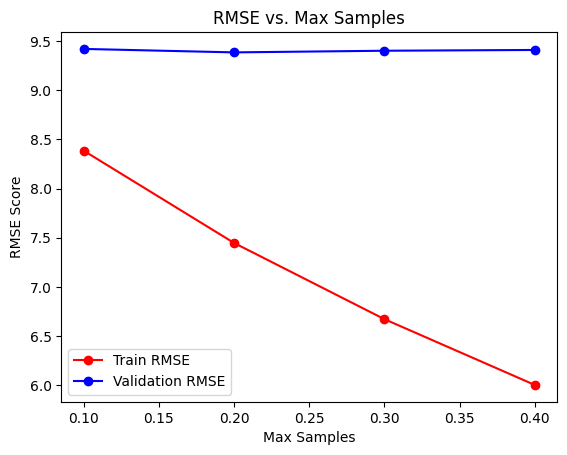

RandomForestRegressor(max_samples=np.float64(0.2), n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_samples', list(np.arange(0.1, 0.5, 0.1)), **best_params)

In [ ]:
best_params['max_samples'] = 0.3

Iteration 1 is successful for min_samples_split=8
Iteration 2 is successful for min_samples_split=10
Iteration 3 is successful for min_samples_split=12
Iteration 4 is successful for min_samples_split=14
Iteration 5 is successful for min_samples_split=16
Best hyperparam value: 14
Best RMSE: 9.387244810022716


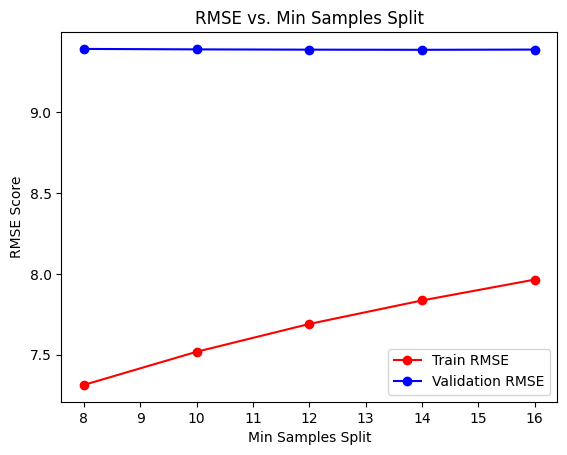

RandomForestRegressor(max_samples=0.3, min_samples_split=14, n_jobs=-1,
                      random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_split', [8, 10 ,12, 14, 16], **best_params)

In [ ]:
best_params['min_samples_split'] = 14

Iteration 1 is successful for min_samples_leaf=7
Iteration 2 is successful for min_samples_leaf=8
Iteration 3 is successful for min_samples_leaf=9
Best hyperparam value: 7
Best RMSE: 9.387355344601197


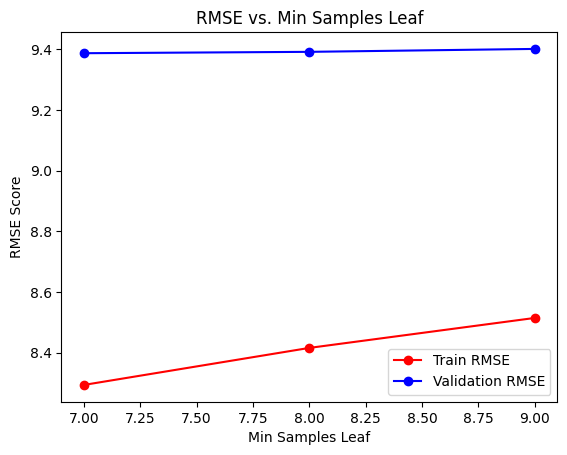

RandomForestRegressor(max_samples=0.3, min_samples_leaf=7, min_samples_split=14,
                      n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_leaf', [7, 8, 9], **best_params)

In [ ]:
best_params['min_samples_leaf'] = 7

In [ ]:
current_best_params = best_params.copy()
del current_best_params['max_samples']

Iteration 1 is successful for max_samples=0.4
Iteration 2 is successful for max_samples=0.5
Iteration 3 is successful for max_samples=0.6
Iteration 4 is successful for max_samples=0.7
Iteration 5 is successful for max_samples=0.7999999999999999
Best hyperparam value: 0.4
Best RMSE: 9.37289747169377


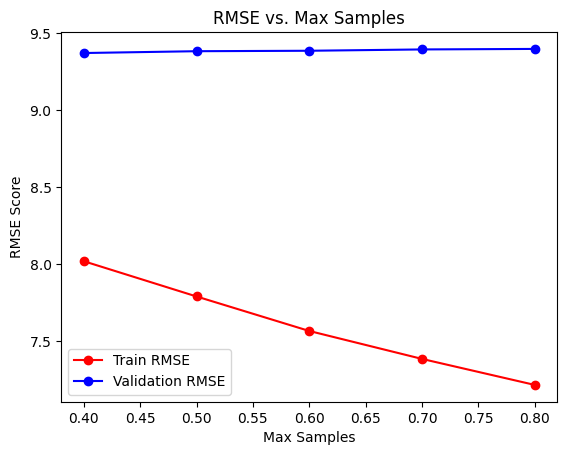

RandomForestRegressor(max_samples=np.float64(0.4), min_samples_leaf=7,
                      min_samples_split=14, n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_samples', list(np.arange(0.4, 0.9, 0.1)), **current_best_params)

In [ ]:
best_params['max_samples'] = 0.4
current_best_params = best_params.copy()
del current_best_params['min_samples_split']

Iteration 1 is successful for min_samples_split=16
Iteration 2 is successful for min_samples_split=17
Iteration 3 is successful for min_samples_split=18
Iteration 4 is successful for min_samples_split=19
Iteration 5 is successful for min_samples_split=20
Best hyperparam value: 18
Best RMSE: 9.3716364740652


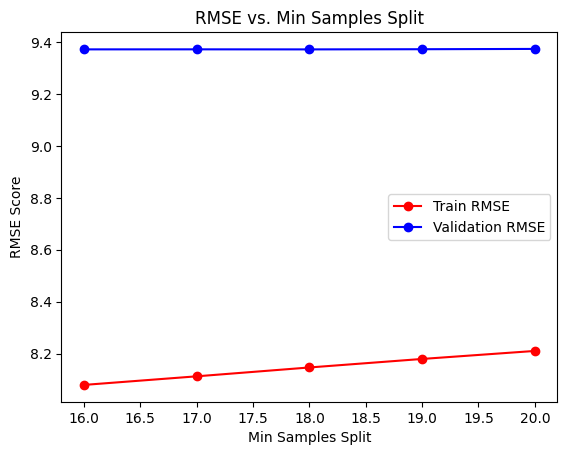

RandomForestRegressor(max_samples=0.4, min_samples_leaf=7, min_samples_split=18,
                      n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_split', [16, 17, 18, 19, 20], **current_best_params)

In [ ]:
best_params['min_samples_split'] = 17
current_best_params = best_params.copy()
del current_best_params['min_samples_leaf']

Iteration 1 is successful for min_samples_leaf=6
Iteration 2 is successful for min_samples_leaf=7
Iteration 3 is successful for min_samples_leaf=8
Best hyperparam value: 6
Best RMSE: 9.36818217425555


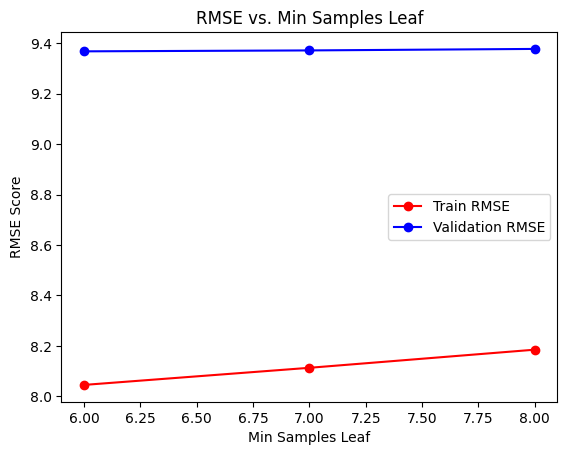

RandomForestRegressor(max_samples=0.4, min_samples_leaf=6, min_samples_split=17,
                      n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_leaf', [6, 7, 8], **current_best_params)

In [ ]:
best_params['min_samples_leaf'] = 6
current_best_params = best_params.copy()
del current_best_params['max_samples']

Iteration 1 is successful for max_samples=0.1
Iteration 2 is successful for max_samples=0.15000000000000002
Iteration 3 is successful for max_samples=0.20000000000000004
Iteration 4 is successful for max_samples=0.25000000000000006
Iteration 5 is successful for max_samples=0.30000000000000004
Iteration 6 is successful for max_samples=0.3500000000000001
Iteration 7 is successful for max_samples=0.40000000000000013
Best hyperparam value: 0.40000000000000013
Best RMSE: 9.36818217425555


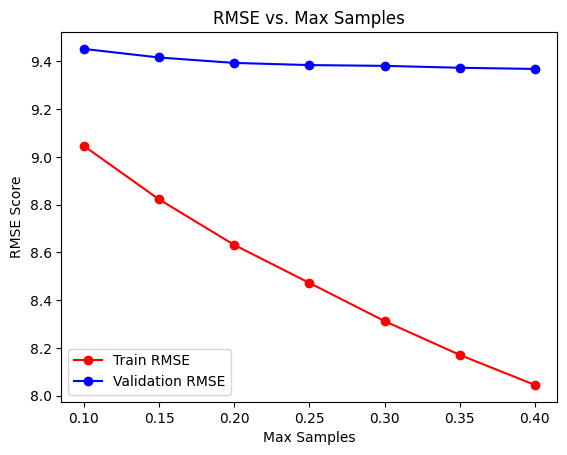

RandomForestRegressor(max_samples=np.float64(0.40000000000000013),
                      min_samples_leaf=6, min_samples_split=17, n_jobs=-1,
                      random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_samples', list(np.arange(0.1, 0.45, 0.05)), **current_best_params)

In [ ]:
y_train.fillna(y_train.mean(), inplace=True)

In [ ]:
best_params['max_samples'] = 0.4

In [ ]:
model = RandomForestRegressor(**best_params)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=0.4, min_samples_leaf=6, min_samples_split=17,
                      n_jobs=-1, random_state=42)

In [ ]:
ohe_test_data = Encoder.transform(test_data[categorical_features])

In [ ]:
X_test_encoded_df = pd.DataFrame(ohe_test_data.toarray(), columns=feature_names_encoded, index=test_data.index)
X_test = pd.concat([test_data[numerical_features], X_test_encoded_df], axis=1)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
def predict_and_submit(trained_model):
  global submission_data
  submission_data['exam_score'] = trained_model.predict(X_test)
  submission_data.to_csv('submission.csv', index=False)

In [ ]:
predict_and_submit(model)

In [ ]:
feature_importances = model.feature_importances_

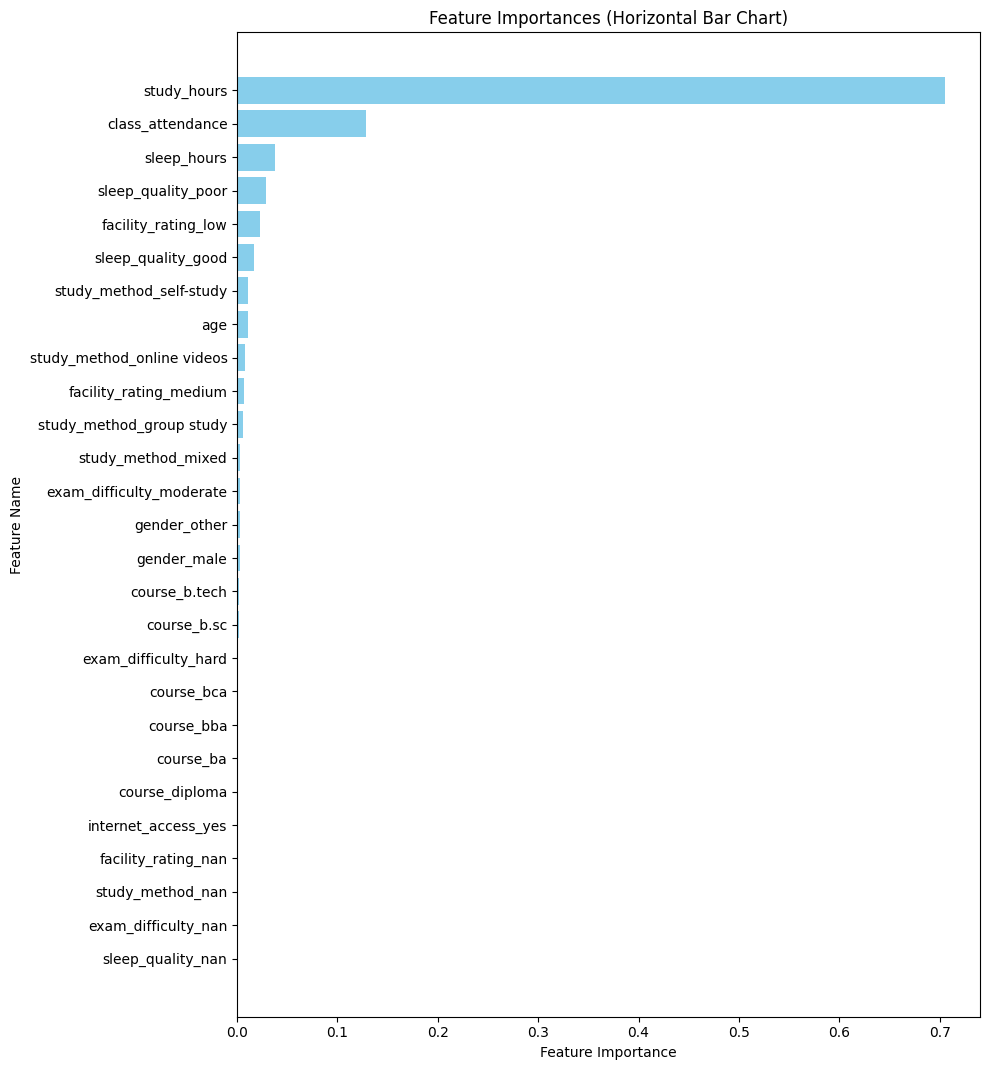

In [ ]:
feature_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, max(6, len(feature_importance_df) * 0.4)))

plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances (Horizontal Bar Chart)')

plt.tight_layout()

plt.show()

In [ ]:
def feature_engineer(df):
  bins = [0, 18, 25, 40, 100]
  labels = ['teen', 'young_adult', 'adult', 'senior_adult']

  # Handle NaN values in numerical columns before multiplication
  df['study_hours'] = df['study_hours'].fillna(0)
  df['class_attendance'] = df['class_attendance'].fillna(0)
  df['sleep_hours'] = df['sleep_hours'].fillna(0)

  # Fill NaN in categorical features with 'unknown' or empty string before concatenation
  for col in ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']:
      if col in df.columns:
          df[col] = df[col].fillna('unknown')

  df['study_sleep_interaction'] = df['study_hours'] * df['sleep_hours']
  df['study_attendance_interaction'] = df['study_hours'] * df['class_attendance']
  df['attendance_per_study_hour'] = df['class_attendance'] / (df['study_hours'] + 1e-6)
  df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
  df['age_group'] = df['age_group'].astype(str).fillna('unknown') # ensure age_group is string and handle potential NaNs

  df['gender_age_group_interaction'] = df['gender'] + '_' + df['age_group']
  df['difficulty_sleep_interaction'] = df['exam_difficulty'] + '_' + df['sleep_hours'].astype(str)
  df['difficulty_attendance_interaction'] = df['exam_difficulty'] + '_' + df['class_attendance'].astype(str)
  df['sleep_attendance_interaction'] = df['sleep_hours'].astype(str) + '_' + df['class_attendance'].astype(str)
  df['study_metod_age_group_interaction'] = df['study_method'] + '_' + df['age_group']
  df['study_metod_sleep_interaction'] = df['study_method'] + '_' + df['sleep_hours'].astype(str)
  df['study_metod_attendance_interaction'] = df['study_method'] + '_' + df['class_attendance'].astype(str)
  df['gender_study_metod_interaction'] = df['gender'] + '_' + df['study_method']
  df['facility_rating_age_group_interaction'] = df['facility_rating'] + '_' + df['age_group']
  df['facility_rating_sleep_interaction'] = df['facility_rating'] + '_' + df['sleep_hours'].astype(str)
  df['facility_rating_attendance_interaction'] = df['facility_rating'] + '_' + df['class_attendance'].astype(str)
  df['facility_rating_difficulty_interaction'] = df['facility_rating'] + '_' + df['exam_difficulty']
  df['facility_rating_study_metod_interaction'] = df['facility_rating'] + '_' + df['study_method']
  df['facility_rating_gender_interaction'] = df['facility_rating'] + '_' + df['gender']
  return df

In [ ]:
Train_df = pd.read_csv('train.csv')
Test_df = pd.read_csv('test.csv')

In [ ]:
Test_df = feature_engineer(Test_df)
Train_df = feature_engineer(Train_df)

In [ ]:
categorical_features = Train_df.select_dtypes(include='object').columns.tolist()

In [ ]:
len(categorical_features)

22

In [ ]:
class LabelEncoder:
    def __init__(self):
        self.classes = {}
        self.columns = []

    def fit(self, X, columns):
        self.columns = columns
        for column in self.columns:
            unique_values = np.sort(X[column].unique())
            self.classes[column] = {val: i for i, val in enumerate(unique_values)}
        return self

    def transform(self, X):
        X_copy = X.copy()
        for column in self.columns:
            X_copy[f'{column}_encoded'] = X_copy[column].map(self.classes[column])
        return X_copy

    def fit_transform(self, X, columns):
        return self.fit(X, columns).transform(X)


In [ ]:
Encoder = LabelEncoder()

In [ ]:
Encoder.fit(Train_df, categorical_features)

In [ ]:
Train_df_encoded = Encoder.transform(Train_df)
Test_df_encoded = Encoder.transform(Test_df)

In [ ]:
Train_df_encoded.drop(categorical_features, axis=1, inplace=True)
Test_df_encoded.drop(categorical_features, axis=1, inplace=True)

In [ ]:
Train_df_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,629990,629991,629992,629993,629994,629995,629996,629997,629998,629999
id,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,629990.000000,629991.000000,629992.000000,629993.00000,629994.00000,629995.000000,629996.000000,629997.000000,629998.000000,629999.00000
age,21.000000,18.000000,20.000000,19.000000,23.000000,24.000000,20.000000,22.000000,22.000000,18.000000,...,23.000000,24.000000,18.000000,19.00000,20.00000,18.000000,21.000000,24.000000,20.000000,18.00000
study_hours,7.910000,4.950000,4.680000,2.000000,7.650000,5.040000,4.280000,4.190000,1.060000,3.440000,...,6.640000,5.950000,6.530000,6.80000,1.67000,4.860000,7.080000,0.640000,1.540000,3.94000
class_attendance,98.800000,94.800000,92.600000,49.500000,86.900000,85.100000,87.000000,44.900000,98.300000,80.900000,...,66.200000,70.300000,78.100000,56.80000,73.70000,70.700000,54.400000,44.200000,75.100000,75.30000
sleep_hours,4.900000,4.700000,5.800000,8.300000,9.600000,9.400000,9.100000,8.800000,5.000000,6.200000,...,5.600000,5.000000,8.400000,6.70000,5.90000,4.100000,4.500000,4.300000,8.200000,5.80000
exam_score,78.300000,46.700000,99.000000,63.900000,100.000000,70.100000,63.400000,76.800000,46.700000,58.200000,...,90.000000,44.200000,78.000000,66.90000,41.70000,69.500000,78.900000,19.599000,59.100000,37.20000
study_sleep_interaction,38.759000,23.265000,27.144000,16.600000,73.440000,47.376000,38.948000,36.872000,5.300000,21.328000,...,37.184000,29.750000,54.852000,45.56000,9.85300,19.926000,31.860000,2.752000,12.628000,22.85200
study_attendance_interaction,781.508000,469.260000,433.368000,99.000000,664.785000,428.904000,372.360000,188.131000,104.198000,278.296000,...,439.568000,418.285000,509.993000,386.24000,123.07900,343.602000,385.152000,28.288000,115.654000,296.68200
attendance_per_study_hour,12.490517,19.151511,19.786321,24.749988,11.359476,16.884917,20.327098,10.715988,92.735762,23.517435,...,9.969878,11.815124,11.960182,8.35294,44.13171,14.547322,7.683615,69.062392,48.766202,19.11167
gender_encoded,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.00000,1.00000,0.000000,0.000000,1.000000,1.000000,2.00000


In [ ]:
Train_df.drop('id', inplace=True, axis=1)
Test_df.drop('id', inplace=True, axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Train_df_encoded.drop(target, axis=1), Train_df_encoded[target], test_size=0.3, random_state=42)

In [ ]:
batch = np.random.randint(low = 0, high = X_train.shape[0], size = X_train.shape[0]//5)
X_batch = X_train.iloc[batch]
y_batch = y_train.iloc[batch]

In [ ]:
best_params = {
    'n_jobs': -1,
    'random_state': 42,
}

Iteration 1 is successful for max_samples=0.1
Iteration 2 is successful for max_samples=0.2
Iteration 3 is successful for max_samples=0.30000000000000004
Iteration 4 is successful for max_samples=0.4
Best hyperparam value: 0.2
Best RMSE: 9.024903640546059


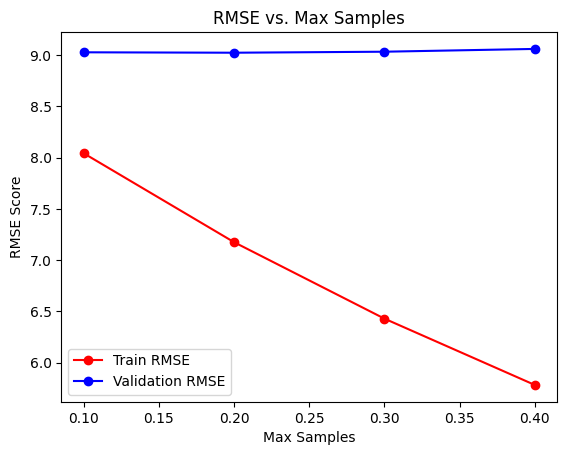

RandomForestRegressor(max_samples=np.float64(0.2), n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_samples', list(np.arange(0.1, 0.5, 0.1)), **best_params)

In [ ]:
best_params['max_samples'] = 0.2

Iteration 1 is successful for max_depth=10
Iteration 2 is successful for max_depth=11
Iteration 3 is successful for max_depth=12
Iteration 4 is successful for max_depth=14
Best hyperparam value: 12
Best RMSE: 9.01123553487082


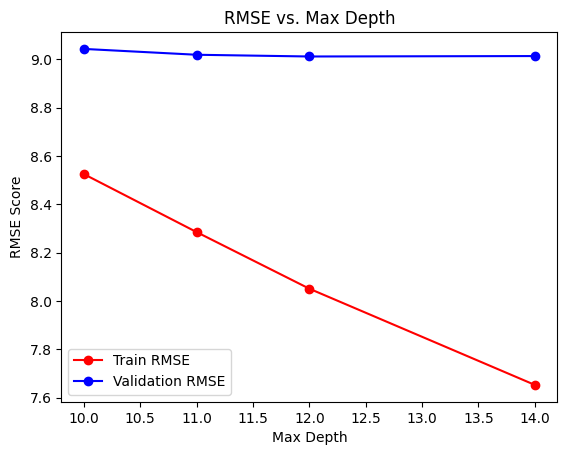

RandomForestRegressor(max_depth=12, max_samples=0.2, n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_depth', [10,11, 12, 14], **best_params)

In [ ]:
best_params['max_depth'] = 12

Iteration 1 is successful for min_samples_split=16
Iteration 2 is successful for min_samples_split=17
Iteration 3 is successful for min_samples_split=18
Iteration 4 is successful for min_samples_split=19
Iteration 5 is successful for min_samples_split=20
Best hyperparam value: 19
Best RMSE: 9.003551754440425


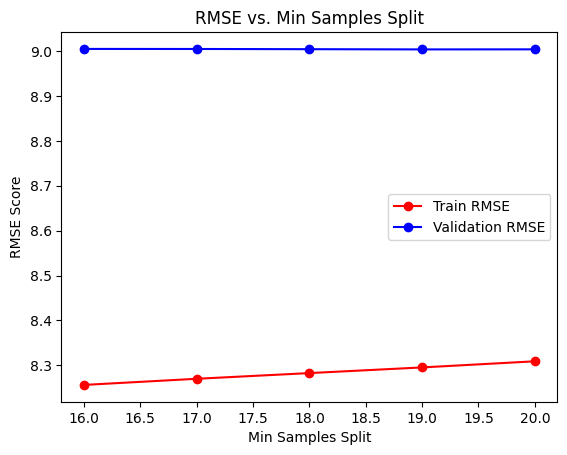

RandomForestRegressor(max_depth=12, max_samples=0.2, min_samples_split=19,
                      n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_split', [16, 17, 18, 19, 20], **best_params)

In [ ]:
best_params['min_samples_split'] = 19

Iteration 1 is successful for min_samples_leaf=8
Iteration 2 is successful for min_samples_leaf=9
Iteration 3 is successful for min_samples_leaf=10
Iteration 4 is successful for min_samples_leaf=11
Iteration 5 is successful for min_samples_leaf=12
Best hyperparam value: 11
Best RMSE: 8.988115718996799


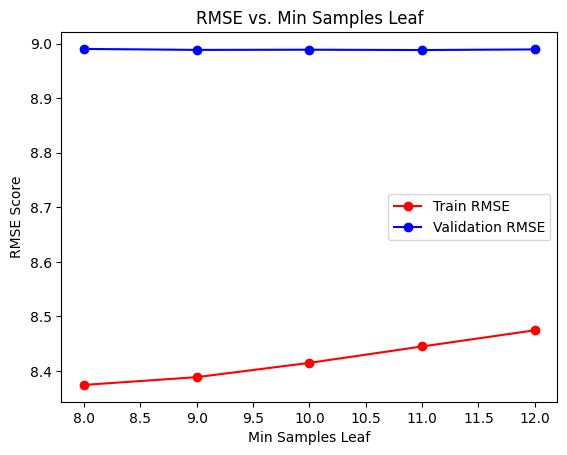

RandomForestRegressor(max_depth=12, max_samples=0.2, min_samples_leaf=11,
                      min_samples_split=19, n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_leaf', [8, 9, 10, 11, 12], **best_params)

In [ ]:
best_params['min_samples_leaf'] = 11

Iteration 1 is successful for max_features=0.4
Iteration 2 is successful for max_features=0.5
Iteration 3 is successful for max_features=0.6
Iteration 4 is successful for max_features=0.7
Iteration 5 is successful for max_features=0.7999999999999999
Iteration 6 is successful for max_features=0.8999999999999999
Iteration 7 is successful for max_features=0.9999999999999999
Best hyperparam value: 0.7
Best RMSE: 8.980856173005776


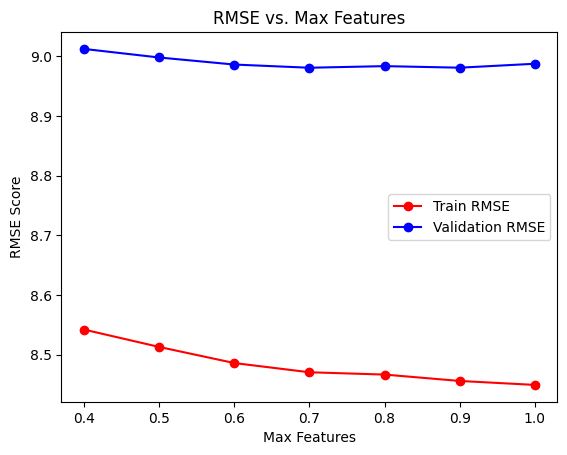

RandomForestRegressor(max_depth=12, max_features=np.float64(0.7),
                      max_samples=0.2, min_samples_leaf=11,
                      min_samples_split=19, n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_features', list(np.arange(0.4, 1.1, 0.1)), **best_params)

In [ ]:
best_params['max_features'] = 0.7

In [ ]:
current_best_params = best_params.copy()
del current_best_params['max_samples']

Iteration 1 is successful for max_samples=0.4
Iteration 2 is successful for max_samples=0.5
Iteration 3 is successful for max_samples=0.6
Iteration 4 is successful for max_samples=0.7
Best hyperparam value: 0.4
Best RMSE: 8.97141534216898


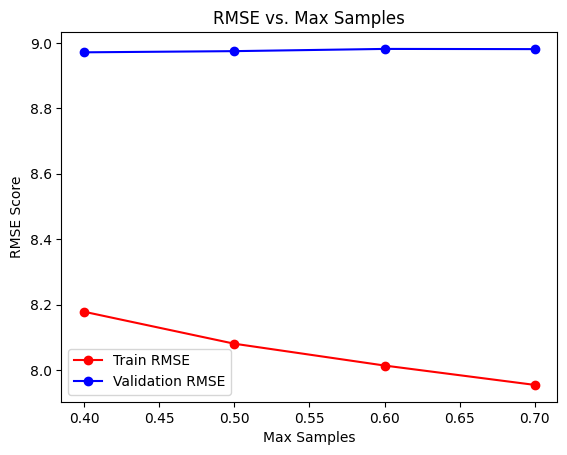

RandomForestRegressor(max_depth=12, max_features=0.7,
                      max_samples=np.float64(0.4), min_samples_leaf=11,
                      min_samples_split=19, n_jobs=-1, random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_samples', list(np.arange(0.4, 0.8, 0.1)), **current_best_params)

In [ ]:
best_params['max_samples'] = 0.4
current_best_params = best_params.copy()
del current_best_params['max_depth']

Iteration 1 is successful for max_depth=12
Iteration 2 is successful for max_depth=13
Iteration 3 is successful for max_depth=14
Iteration 4 is successful for max_depth=15
Iteration 5 is successful for max_depth=16
Best hyperparam value: 15
Best RMSE: 8.967282566441806


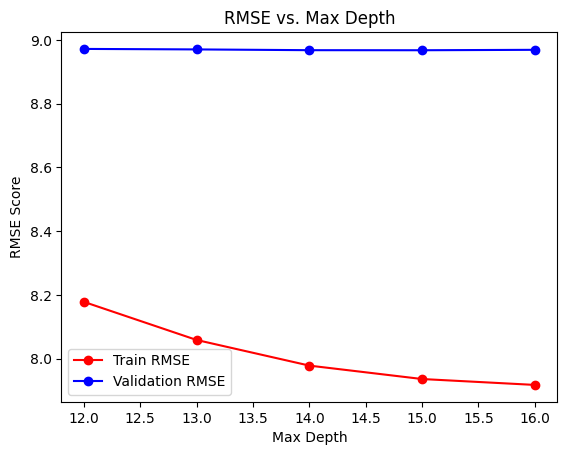

RandomForestRegressor(max_depth=15, max_features=0.7, max_samples=0.4,
                      min_samples_leaf=11, min_samples_split=19, n_jobs=-1,
                      random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'max_depth', [12, 13, 14, 15, 16], **current_best_params)

In [ ]:
best_params['max_depth']=15
current_best_params = best_params.copy()
del current_best_params['min_samples_split']

Iteration 1 is successful for min_samples_split=12
Iteration 2 is successful for min_samples_split=14
Iteration 3 is successful for min_samples_split=16
Iteration 4 is successful for min_samples_split=18
Best hyperparam value: 12
Best RMSE: 8.967282566441806


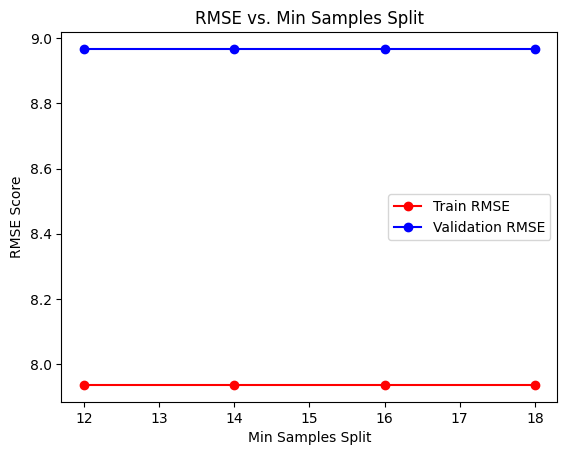

RandomForestRegressor(max_depth=15, max_features=0.7, max_samples=0.4,
                      min_samples_leaf=11, min_samples_split=12, n_jobs=-1,
                      random_state=42)

In [ ]:
test_params_and_plot(RandomForestRegressor, 'min_samples_split', [12, 14, 16, 18], **current_best_params)

In [ ]:
best_params['min_samples_split'] = 11

In [ ]:
best_params['n_estimators'] = 300

In [ ]:
model = RandomForestRegressor(**best_params)

In [ ]:
%time model.fit(X_train, y_train)

CPU times: user 22min 36s, sys: 2.51 s, total: 22min 38s
Wall time: 12min 59s


RandomForestRegressor(max_depth=15, max_features=0.7, max_samples=0.4,
                      min_samples_leaf=11, min_samples_split=11,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
predict_and_submit(model)